In [1]:
import numpy as np
from mean_average_precision import MetricBuilder

In [54]:
# [xmin, ymin, xmax, ymax, class_id, difficult, crowd]
gt = np.array([
    [439, 157, 556, 241, 0, 0, 0],
    [437, 246, 518, 351, 0, 0, 0],
    [515, 306, 595, 375, 0, 0, 0],
    [407, 386, 531, 476, 0, 0, 0],
    [544, 419, 621, 476, 0, 0, 0],
    [609, 297, 636, 392, 0, 0, 0]
])

# [xmin, ymin, xmax, ymax, class_id, confidence]
preds = np.array([
    [429, 219, 528, 247, 0, 0.460851],
    [433, 260, 506, 336, 0, 0.269833],
    [518, 314, 603, 369, 0, 0.462608],
    [592, 310, 634, 388, 0, 0.298196],
    [403, 384, 517, 461, 0, 0.382881],
    [405, 429, 519, 470, 0, 0.369369],
    [433, 272, 499, 341, 0, 0.272826],
    [413, 390, 515, 459, 0, 0.619459]
])
print('gt', len(gt))
print('preds', len(preds))

gt 6
preds 8


In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [37]:
x = np.full((800, 800, 3), 255, dtype=np.uint8)
print(x.shape, x.dtype)

(800, 800, 3) uint8


Figure(1440x720)


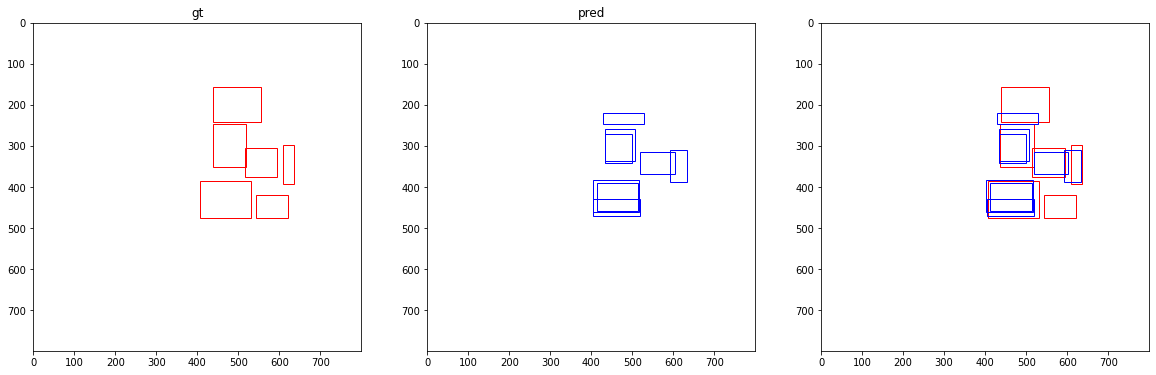

In [53]:
#fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

fig, axs = plt.subplots(ncols=3, squeeze=False, figsize=(20,10))
#fig.figure(figsize=(12, 4))
print(fig)

def draw_boxes(arr, color):
    for row in arr:
        rect = patches.Rectangle((row[0], row[1]), row[2]-row[0], row[3]-row[1], linewidth=1, edgecolor=color, facecolor="none")
        ax.add_patch(rect)

ax = axs[0, 0]

ax.imshow(x)
ax.set_title('gt')
draw_boxes(gt, 'r')        

ax = axs[0, 1]
ax.imshow(x)
ax.set_title('pred')
draw_boxes(preds, 'b')        

ax = axs[0, 2]
ax.imshow(x)
draw_boxes(gt, 'r')        
draw_boxes(preds, 'b')        

plt.show()

In [42]:
# print list of available metrics
print(MetricBuilder.get_metrics_list())

# create metric_fn
metric_fn = MetricBuilder.build_evaluation_metric("map_2d", async_mode=False, num_classes=1)


['map_2d']


In [4]:
metric_fn.add(preds, gt)

In [5]:
# compute PASCAL VOC metric
print(f"VOC PASCAL mAP: {metric_fn.value(iou_thresholds=0.5, recall_thresholds=np.arange(0., 1.1, 0.1))['mAP']}")

# compute PASCAL VOC metric at the all points
print(f"VOC PASCAL mAP in all points: {metric_fn.value(iou_thresholds=0.5)['mAP']}")

# compute metric COCO metric
print(f"COCO mAP: {metric_fn.value(iou_thresholds=np.arange(0.5, 1.0, 0.05), recall_thresholds=np.arange(0., 1.01, 0.01), mpolicy='soft')['mAP']}")

VOC PASCAL mAP: 0.5
VOC PASCAL mAP in all points: 0.5
COCO mAP: 0.15730197727680206
